# Walmart Sales Analysis

Video Presentation: https://drive.google.com/file/d/1Lr8T9Johyj2Lx8tYF1e73e2GfMME5vR2/view?usp=sharing

# Abstract

In this project, we conducted an analysis on the trends of Walmart sales over 3 years. We wished to mainly focus on the factor of temperature, with questions about seasonal trends as well as the effects of abnormal temperatures. Background work shows that retail sales are significantly affected by weather, so we wish to see if this is the case in our analysis as well. Our results showed significance on the relationship between temperature and sales, without a significant relationship from the factor of temperature changes and abnormality. The December period also counfounds our analysis with significantly increased sales, however with data filtering we showed that this isn't based on the temperature or temperature changes, rather on the Christmastime sales boom. After filtering out this data, we get a quadratic OLS model with statistical significance.

# Research Question

Do cyclic factors such as weather, temperature, and holidays influence the number of sales made at a retail store like Walmart? Is this influenced by just abnormal temperatures (i.e. a specific week being colder than usual), or are sales generally at different amounts during different seasons?

## Background and Prior Work

From previous sources, we were able to deduce that there is a significant correlation between weather and retail sales not only influencing sales in brick-and mortar stores but online as well. Furthermore, from the studies we can observe how weather influences not only the frequency of purchase but also the items being purchased themselves. In the study, “Accounting for Climate When Determining the Impact of Weather on Retail Sales”<a name="cite-ref_1"></a>[<sup>1</sup>](#cite_note-1) the researchers utilised point-of-sale data from 200 stores in France, spanning the years 2014 and 2015. The data included various variables relevant to the analysis, with the main variables of interest being sales and the mean-weekly temperature. By observing the correlation between the two variables, the researchers were able to conclude that temperature is one of many weather related factors that influence sales. The researchers explain that location, precipitation, and UV intensity all play a role as well. This being said, while temperature is important, this study explored how the relationship between weather variables (such as how intense rain affects one's method of transport to the store) affects sales.

In the study, “The impact of daily weather on retail sales: An empirical study in brick-and-mortar stores”<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2) the researchers use data from a German retailer, encompassing daily sales data from 673 retail stores for the years 2013 and 2014. This dataset includes daily revenue, the number of items sold, and the product categories. The study employs empirical models with a log-linear formulation. They make daily store sales in Euros the dependent variable, with three key weather parameters as the independent variable of influence. These weather parameters are: average daily temperature (in °C), precipitation (in mm), and sunshine duration (in hours). From analyzing this data, they were able to deduce that although the fact that sales vary between stores due to outside influences (location, parking availability, store size etc) they were able to observe consistent trends in relation to weather. For instance, when the weather is pleasant, people may be more inclined to engage in outdoor activities rather than visiting physical stores. Conversely, bad weather might lead consumers to stay at home or choose online shopping over in-store visits. 

1. <a name="cite_note-1"></a> [^](#cite_ref-1) Dimitrov, Chenavaz, Escobar. (Sep 2023) Accounting for Climate When Determining the Impact of Weather on Retail Sales. *The New York Times*. https://www.mdpi.com/2673-7116/3/3/30
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Badorf, Hoberg. (Jan 2020) https://www.sciencedirect.com/science/article/abs/pii/S0969698919303236

# Hypothesis


We believe that the relationship between temperature and sales would be roughly normally distributed, where extreme temperatures on either end of the spectrum would discourage people from going to a store and shopping. An average, 70-80 degree day would likely be the most common temperature for people to want to go out and shop, thus we believe that the distribution is going to be unimodal at a temperature around that. We also believe that this is more likely to be more pronounced in abnormal weather weeks, where a seasonal trend will still have people shopping in extreme temperatures since it is the only way for them to get the necessities. Further, we think that some seasonal trends (increased sales in November and December due to the holiday season) will be discovered, which we can account for as outliers when discovering overall trends.

# Data

## Data overview

**Our ideal dataset:** For this experiment, an ideal dataset would include the average temperature in a single day, the number of sales/transactions per day, and some information about the day regarding the season it is currently in. With these variables, we can also query the data to get the average of the temperature and number of sales per week, instead of using the day to day data. Ideally, we would want to get data from every Walmart store across the country with every transaction recorded. This would be stored in a semi-structured file, allowing us to query a day or date to get all information about that day.

**Data we found:**
- Dataset Name: Walmart Dataset (from Kaggle)
- Link to the dataset: https://www.kaggle.com/datasets/yasserh/walmart-dataset
- Number of observations: 6435
- Number of variables: 8

A dataset that we found contains 45 Walmart stores weekly sales recorded for almost 3 years. The website Kaggle, has a dataset including both the temperatures and sale counts that we can utilise. That said, the observations are only over 3 years, which could be a limitation since it may not help us find seasonal trends (rather, abnormalities that may have occurred over those 3 years), however it still contains a lot of data that we believe we would be able to analyze.

Some important variables in the dataset are the date (which we will use for an estimation of the current season, i.e. November and December for winter sales), the weekly sales (which will be used in conjunction with the date for a season based analysis), the weekly temperature (which will help answer our question about the importance of weather), as well as the holiday flag (to filter out abnormalities). 

**Wrangling plan:** At first glance, the data seems to be clean and in a usable format, with all variables in usable datatypes, but this is something we will analyse further when data-wrangling. Looking over the data, there seems to be no missing data, but again, when wrangling in Pandas, we will make sure of this and drop or source any data which seems to be missing. We will clean the data by loading it into Pandas. We will then do some basic type-manipulation, such as making the 0/1 holiday flag into a boolean to make it easier to use. We can make the date column into a pandas datetime object, as well as making sure one column is always in a single datatype (since the temperature column seems to be a mix of floating point numbers and integers.

## Dataset Cleaning

#### Load the Data

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None
df = pd.read_csv('Walmart.csv')

#### Explore Shape, Size, Datatypes

In [3]:
df.shape

(6435, 8)

In [4]:
df.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

Looks like the shape is exactly what we expected, with 143 weeks of data (and 45 datapoints per week, for the 45 stores) of observations, and the 8 columns of data.

In [5]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

So like expected, the date needs to be changed into a datetime format. The holiday flag could also be made into a boolean. Apart from that, the data looks great

#### Data Cleaning

In [6]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

No missing values! 

In [7]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Date'].head()

0   2010-02-05
1   2010-02-12
2   2010-02-19
3   2010-02-26
4   2010-03-05
Name: Date, dtype: datetime64[ns]

In [8]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

Now let's clean the holiday flag

In [9]:
df['Holiday_Flag'] = df['Holiday_Flag'].astype('bool')
df['Holiday_Flag'].head()

0    False
1     True
2    False
3    False
4    False
Name: Holiday_Flag, dtype: bool

Just to make the index easier to use without worrying about letter case:

In [10]:
df.columns = [x.lower() for x in df.columns]

And finally:

In [11]:
df

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,day,month,year
0,1,2010-02-05,1643690.90,False,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,True,38.51,2.548,211.242170,8.106,12,2,2010
2,1,2010-02-19,1611968.17,False,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,False,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-03-05,1554806.68,False,46.50,2.625,211.350143,8.106,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,False,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-10-05,733455.07,False,64.89,3.985,192.170412,8.667,5,10,2012
6432,45,2012-10-12,734464.36,False,54.47,4.000,192.327265,8.667,12,10,2012
6433,45,2012-10-19,718125.53,False,56.47,3.969,192.330854,8.667,19,10,2012


# Results

## Exploratory Data Analysis

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import statsmodels.formula.api as smf
import numpy as np

### Exploring the relationship between date and sales

We wish to first start by looking at some seasonal trends, like dates and holiays. This can show us if any outliers in sales exist that may skew our analysis of weather based sales data.

[]

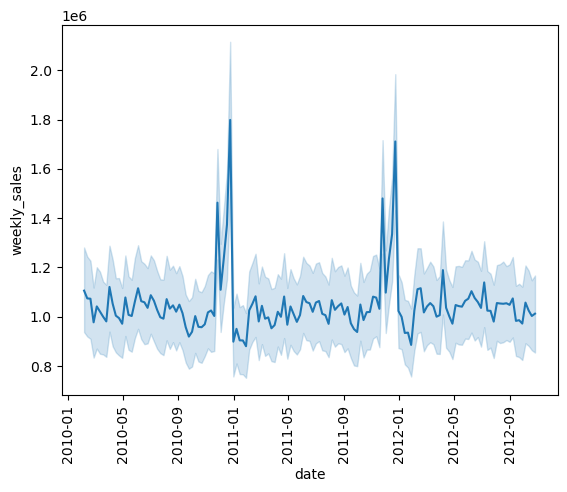

In [13]:
sns.lineplot(data=df, x='date', y='weekly_sales')
plt.xticks(rotation=90)
plt.plot()

There is a clear seasonal peak in the data, seeming to coincide on the Christmas / holiday season. This is definitely a metric we can explore more in our final analysis. If we find out that sales are higher during the winter season, this is a result we can come back to.

### Exploring the relationship between holidays and sales

Similar to the date - a holiday may be a confounding variable in terms of not accurately providing data for weather based sales trends. Let's look into if this variable does influence sales.

In [14]:
df['holiday_flag'].value_counts()

False    5985
True      450
Name: holiday_flag, dtype: int64

So over the given time period, we have 450 days that are marked as holidays, and almost 6000 that are marked as non-holidays. Let's visualise if these variables are correlated.

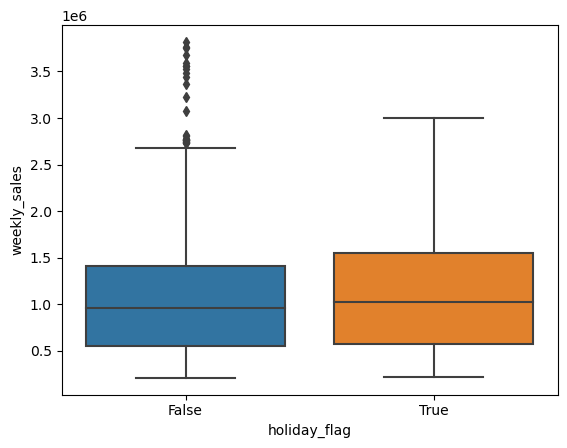

In [15]:
sns.boxplot(data=df, x='holiday_flag', y='weekly_sales')
plt.show()

Although the boxplot makes it look like there might be a difference, between the variables, the visual isn't very clear. To confirm this, we should conduct a t-test and calculate the test statistic and p-value.

In [16]:
is_holiday = df[df['holiday_flag'] == True]['weekly_sales']
not_holiday = df[df['holiday_flag'] == False]['weekly_sales']
t_val, p_val = ttest_ind(is_holiday, not_holiday)

(t_val, p_val)

(2.9608919093259036, 0.003078699263818616)

The p-value we got is 0.00307, which is significanly less than 0.05. This indicates that there is a significant difference in sales during holidays and non-holidays. This means this is likely a variable we can analyse when generating models and exploring relationships between the variables!

In [35]:
holiday_sales = np.round(df[df['holiday_flag'] == True]['weekly_sales'].mean(), 2)
non_holiday_sales = np.round(df[df['holiday_flag'] == False]['weekly_sales'].mean(), 2)

In [36]:
(holiday_sales, non_holiday_sales)

(1122887.89, 1041256.38)

As we can see, the average sales during holidays is much higher than during non-holidays.

### Exploring the relationship between temperatures and sales

Finally, our most crucial variable, let's look at what trends we can notice in sales against temperature

In [17]:
df['temperature'].describe()

count    6435.000000
mean       60.663782
std        18.444933
min        -2.060000
25%        47.460000
50%        62.670000
75%        74.940000
max       100.140000
Name: temperature, dtype: float64

We have temperatures ranging from less than -2 to more than 100, which is quite a big range. First, let's see if there's a relationship in general between these variables. Then, we will break it up by region.

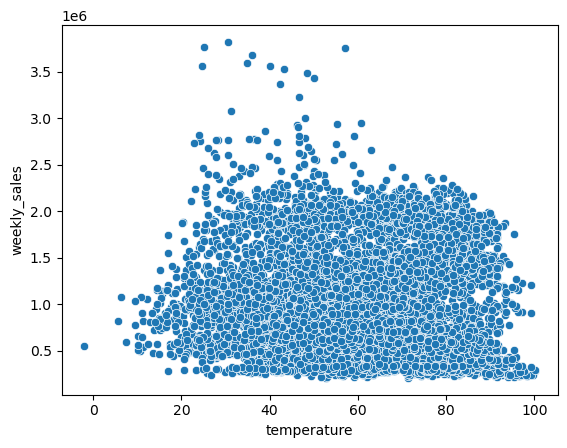

In [18]:
sns.scatterplot(data=df, x='temperature', y='weekly_sales')
plt.show()

While there are a few things we can pick out here, such as more sales being driven on moderately temperatured days, there isn't a clear relationship we can discern, since the scatter plot has so many points clumped together. We can explore this with averaged values to make things more clear.

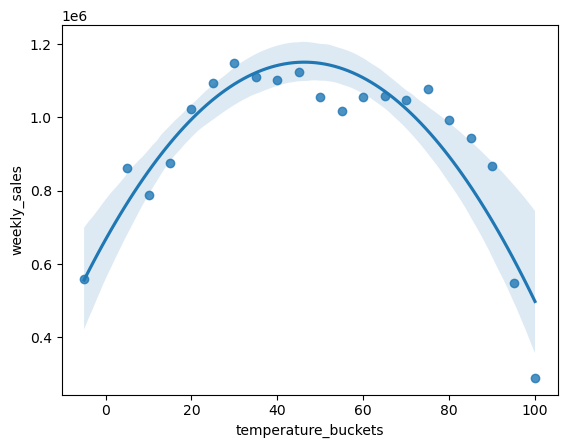

In [19]:
df_cut = df.copy()
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105]
df_cut['temperature_buckets'] = pd.cut(df['temperature'], bins).cat.codes * 5
avg_temps = df_cut.groupby('temperature_buckets')[['temperature_buckets', 'weekly_sales']].mean(numeric_only=True)
sns.regplot(data=avg_temps, x='temperature_buckets', y='weekly_sales', order=2)
plt.show()

Overall, it looks like there is a relationship between temperature and average sales, however far more analysis needs to be done on a deeper level, looking at individual store data, abnormal weather days, holiday periods, and so on.

## The Analysis of General Seasonal Weather Trends

We finally start on our final analysis, looking at this variable in more depth. We start by asking if this is something that is confounded by a different variable. Note that this shows us the average sales given temperature buckets for 50 different stores. If a certain store is in a colder region (say Alaska), and just happens to have lower sales year-round, it would confound our analysis and make it look like lower temperature days reduce sales, when in reality it is simply the data from a single store. Lets see the breakdown of sales by store, since this data is for 50 different stores. We're going to explore just one store first, store "5".

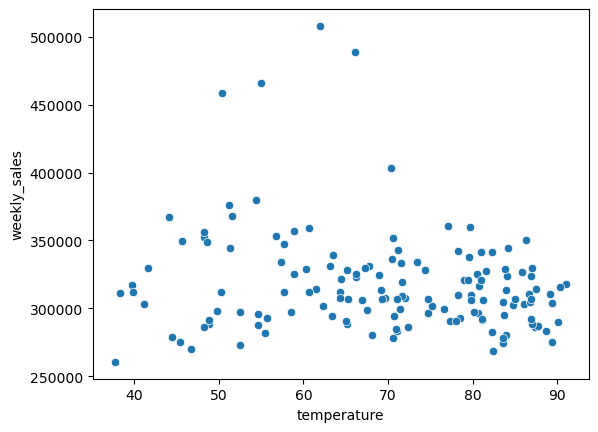

In [20]:
sns.scatterplot(data=df[df['store'] == 5], x='temperature', y='weekly_sales')
plt.show()

There may be a relation here, but it is hard to tell! Apart from a slightly lower amount of sales between 35 and 45 degrees, and after 85 degrees, this isn't very clear. Also, the 5 weeks with abnormally high sales may simply be due to them being on a holiday. Let's see if this is the case.

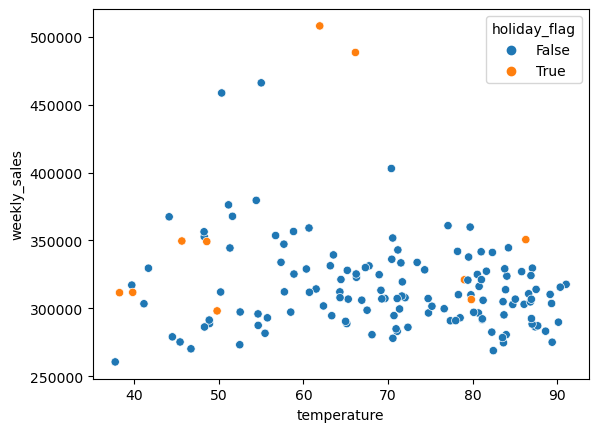

In [21]:
sns.scatterplot(data=df[df['store'] == 5], x='temperature', y='weekly_sales', hue='holiday_flag')
plt.show()

It was for 2 points, but not for 2 others. This doesn't seem to tell us much, since there doesn't seem to be a clear relation. That said, since all days in this store seem to be at relatively moderate temperatures, and our EDA shows sharp dropoffs only at specific temperatures, this graph would likely not contribute to our analysis. Let's check the stores that actually do have extreme temperatures. Looking at the data from the EDA, there seems to be a sharp dropoff below 10 degrees and above 90 degrees.

In [22]:
extreme_temp = df[(df['temperature'] < 10) | (df['temperature'] > 90)]['store'].unique()
extreme_temp.shape

(20,)

So only 20 out of the 50 stores we have data about had an extreme temperature day. Let's plot data from only these stores, to not add more irrelevant data to the graph

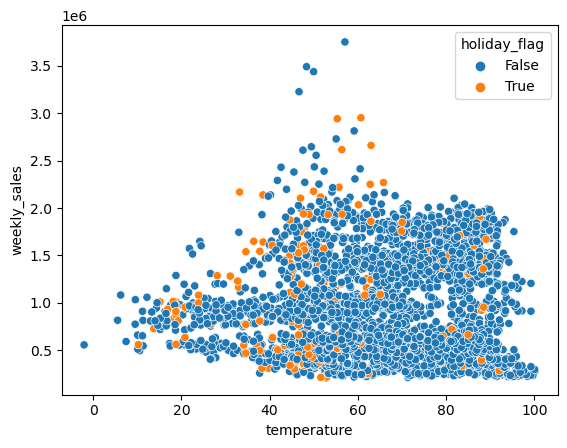

In [27]:
extreme_temp_df = df[df['store'].isin(extreme_temp)].reset_index()
sns.scatterplot(data=extreme_temp_df, x='temperature', y='weekly_sales', hue='holiday_flag')
plt.show()

There already seems to be a stronger relation, seeing massive dropoffs in sales at low temperatures. Let's take data from every store and normalise the sales to the range of [0, 1]. Then, we would be able to compare relative differences in temperature, rather than the exact sales. A store that always has double the amount of sales as another store shouldn't make the data seem more spread apart. We're looking for relative trends, not exact sales values.

In [29]:
temp_max = extreme_temp_df.groupby('store')['weekly_sales'].max()
norm_temp = extreme_temp_df['weekly_sales'] / temp_max[extreme_temp_df['store']].reset_index()['weekly_sales']
extreme_temp_df['adjusted_sales'] = norm_temp

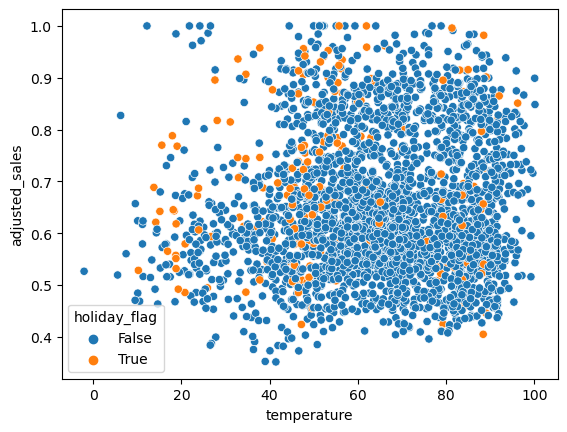

In [30]:
sns.scatterplot(data=extreme_temp_df, x='temperature', y='adjusted_sales', hue='holiday_flag')
plt.show()

Interestingly enough, it seems like although there is a dropoff in sales at temperatures below 40, there are 8 outlier datapoints. Perhaps they coincide with the holiday season, despite not being on actual holidays. Often, sales increase significantly during Christmastime, not just on Christmas. December holidays may be the reason for increased sales, which is well known to be the highest sale season in the US. This is something we discovered in our EDA with the two peaks in sales at December-time. Is this the case? Let's check the month of those data points.

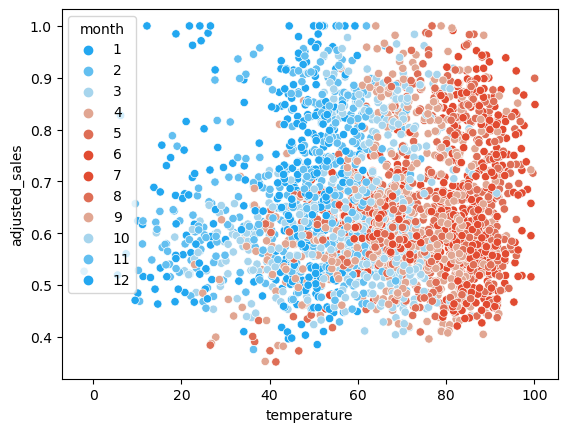

In [31]:
palette = ["#22a7f0", "#63bff0", "#a7d5ed", "#e1a692", "#de6e56", "#e14b31"]
palette += palette[::-1]
sns.scatterplot(data=extreme_temp_df, x='temperature', y='adjusted_sales', hue='month', palette=palette)
plt.show()

Seems like it! Let's remove those data for 2 weeks before, and 2 weeks after Christmas. This would hopefully let us avoid those outlier dates, not letting them confound our analysis

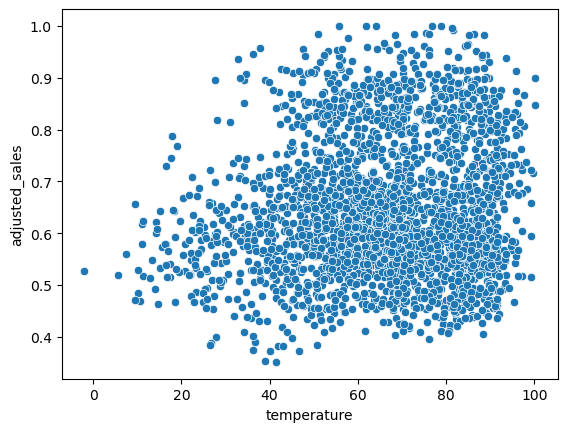

In [32]:
december_adjusted_df = extreme_temp_df[~(((extreme_temp_df['month'] == 12) & (extreme_temp_df['day'] >= 11)) | ((extreme_temp_df['month'] == 1) & (extreme_temp_df['day'] <= 8)))]
sns.scatterplot(data=december_adjusted_df, x='temperature', y='adjusted_sales')
plt.show()

So those were datapoints that were right at Christmastime, as we expected based on our EDA graph! We have cleaned up the data, removed confounding data of the holiday season, filtered to only stores that have extreme weather, and our now able to form a model on this data. It's time to try some OLS. We choose to use a quadratic model since there is a clear tapering off on both ends of the data.

In [33]:
model = smf.ols(formula='adjusted_sales ~ np.square(temperature) + temperature', data=december_adjusted_df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         adjusted_sales   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     23.08
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           1.15e-10
Time:                        22:35:13   Log-Likelihood:                 1689.9
No. Observations:                2700   AIC:                            -3374.
Df Residuals:                    2697   BIC:                            -3356.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.5115      0.022     23.276      0.000       0.468       0.555
np.square(temperature) -2.631e-05   5.94e-06     -4.430      0.000    -3.8e-05   -1.47e-05
temperature                0.0039      0.001      5.306      0.000       0.002       0.005
==============================================================================
Omnibus:                      148.727   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.067
Skew:                           0.519   Prob(JB):                     3.16e-32
Kurtosis:                       2.541   Cond. No.                     4.63e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

With p-values of 0 for every component, we can be relatively sure that this model isn't just coincidence. There is clear evidence of a tapering off in sales on both sides.

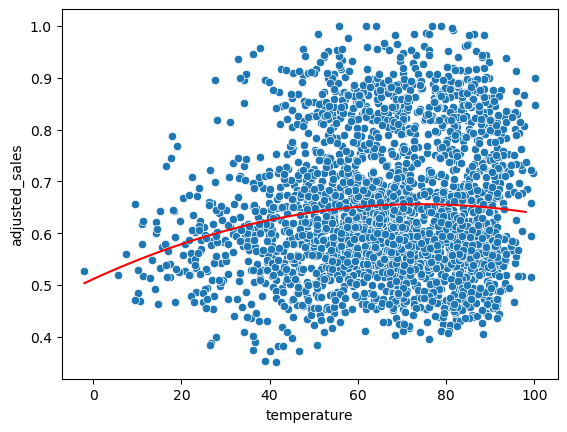

In [76]:
x = np.arange(-2, 100, 2)
y = -2.631e-05*(x**2) + 0.0039*(x) + 0.5115
sns.scatterplot(data=december_adjusted_df, x='temperature', y='adjusted_sales')
plt.plot(x, y, color='r')
plt.show()

While the line certainly doesn't go through every data point, this is expected since this data aggregates 3 years of sales for 20 stores. In general however, our OLS p-value data as well as well as insepction of this graph shows that extremely low temperatures (below 30 or so) lead to declined sales, even adjusted for region-based sale figures. Let's now look at one more piece of the analysis - whether abnormal temperatures have any effect.

## The Analysis of Abnormal Weather Trends

Let's try answering the second major question of our analysis - are these temperature based sales trends only really indicative of seasonal trends (i.e. colder days are typically in the winter, when people want to shop less) or is there a sharp dropoff in sales on an abnormally cold week in the summer. We start by normalising data as before and removing Christmastime and holiday data, then creating delta-columns and looking at differences in temperature over time.

In [278]:
df_adjusted = df.copy()
temp_max = df_adjusted.groupby('store')['weekly_sales'].max()
norm_temp = df_adjusted['weekly_sales'] / temp_max[df_adjusted['store']].reset_index()['weekly_sales']
df_adjusted['adjusted_sales'] = norm_temp
df_adjusted = df_adjusted[~(((df_adjusted['month'] == 12) & (df_adjusted['day'] >= 11)) | ((df_adjusted['month'] == 1) & (df_adjusted['day'] <= 8)))]

In [279]:
changes = df_adjusted.groupby('store')[['adjusted_sales', 'temperature']].diff()
df_adjusted[['sale_delta', 'temperature_delta']] = changes
df_adjusted = df_adjusted.dropna()
df_adjusted = df_adjusted[~df_adjusted['holiday_flag']]
df_adjusted[['sale_delta', 'temperature_delta']]

,sale_delta,temperature_delta
2,-0.012559,1.42
3,-0.084692,6.70
4,0.060755,-0.13
5,-0.048269,11.29
6,0.013809,-3.21
...,...,...
6430,-0.005890,-0.44
6431,0.012052,0.01
6432,0.000600,-10.42
6433,-0.009709,2.00


<Axes: xlabel='temperature_delta', ylabel='sale_delta'>

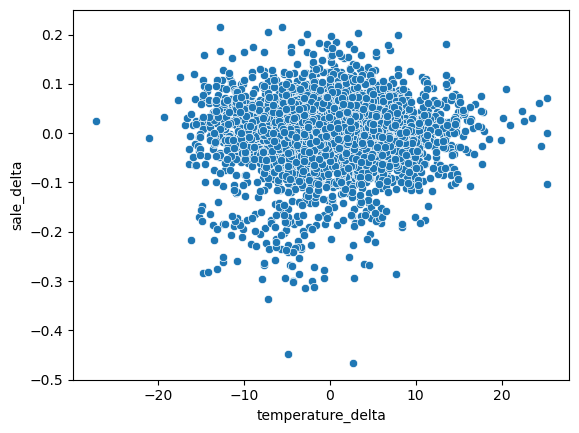

In [280]:
sns.scatterplot(data=df_adjusted, x='temperature_delta', y='sale_delta')

Again, this doesn't tell us a lot since most of the temperature deltas are clumped around the 0 mark, indicating a minor change in temperature. We only really care about major temperature differences, so let's filter onto that data. Let's also take a look at months.

<Axes: xlabel='temperature_delta', ylabel='sale_delta'>

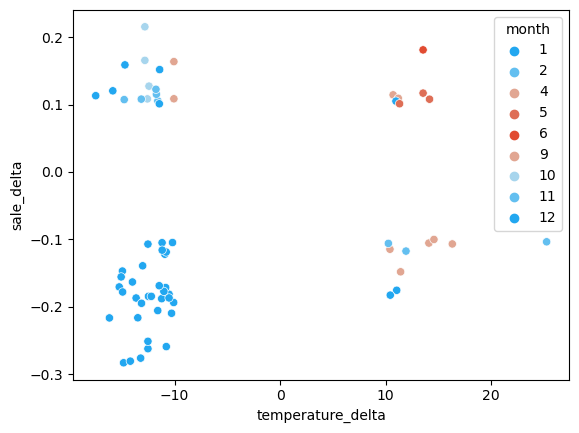

In [281]:
changes = df_adjusted[(df_adjusted['temperature_delta'] > 10) | (df_adjusted['temperature_delta'] < -10)]
changes = changes[(changes['sale_delta'] > 0.1) | (changes['sale_delta'] < -0.1)]
sns.scatterplot(data=changes, x='temperature_delta', y='sale_delta', hue='month', palette = [palette[i] for i in sorted(changes['month'].unique() - 1)])

Although there are a few individual ideas we can pick out here, there is no clear trend in the sales changes during abnormal temperature weeks. For example, one idea that can be seen is that in cold months (dark blue), a large drop in temperature often leads to 20-30% reductions in sales (which can be seen on the bottom left of the graph). That said, there are still outliers, such as a clump of datapoints from moderately cold months with a 10-15% increase in sales given a drop in temperature (seen in the top left of the graph). All in all, it seems like although there may be a slight trend in avoiding shopping given a sharp decrease in temperature, this isn't something that is a consistent relationship.

# Ethics & Privacy

Handling this particular dataset alone, we are confident that sales figures cannot be indirectly linked to the PII individual customers. Conveniently, informed consent and the right to be forgotten seem irrelevant here, as it is so far removed from these variables. Our data retention plan is consistent with previous COGS 108 projects, a GitHub repository that can be taken down anytime. Subsequently, our audibility is fully transparent, as our Jupyter Notebook will include all code used to generate our analysis and can thus be reproduced. Redress is beyond the scope of this project. While the data is comprehensive in its rows, maintains tidiness throughout its 140+ unique values, and is legitimate in its licensing and review, it is limited in its 8 columns. Ethically, this works to our benefit, as we have easily and thoroughly reviewed each column, its data, as well as ethical and privacy implications. Let’s walk through each of them.

**Store Number:** The dataset comprises data from 45 stores, raising an ethical concern that comes with any study working with regional representation and, subsequently, demographic ones. It’s our understanding that variation in CPI and unemployment index per region could introduce bias on the socio-economic spectrum, particularly when investigating regions with considerably homogeneous demographics. We don’t see the store number directly impacting consumer or employee privacy. 

**Date:** We are aware that dates or periods of time can carry a certain cultural weight or political sensitivity. While hopefully unlikely, it’s entirely possible that our findings reveal an irregularity in consumer spending within a particular region over a period of time of known political consequence. Imagine there is a significant shift in spending during, say, an international conflict, civil rights movement, or natural disaster, for example. This ethical concern is extremely nuanced, but we wouldn’t want to raise anti-capitalism rhetoric or support claims against Walmart’s political motives and take monetary advantage during times of crisis. To combat these concerns, we should avoid listing specific dates, especially sensitive ones. We should balance specificity in our data visualization and be broad enough.

**Weekly Sales:** Not a typical privacy concern, but it has the potential to reveal strategic insights into store performance to competitors. If not anonymized, it could potentially be traced back to individual store managers or employees, leading to privacy breaches or unfair judgments on their performance.

**Holiday Flag:** Ethical considerations here could involve the cultural and societal implications of sales performance during holidays. If certain holidays show significantly higher sales, this could indicate cultural consumption patterns that may be sensitive. It's important to handle such data respectfully, ensuring that no cultural group is stigmatized or unfairly characterized based on their holiday purchasing behaviours.

**Temperature:** The main variable of interest. Assumptions could be made about behavior in certain climates, which may be ethically sensitive if tied to demographic or socioeconomic status based on the cost of living and cultures founded around their extreme living conditions. We wouldn’t want the resilience of consumers in particular areas to perpetuate stereotypes about their spending habits.

# Discusison and Conclusion

Our final project aimed to analyze the relationship between temperature, seasonal trends, and retail store sales in various Walmart stores throughout the country. The main question we tried to answer was whether average weekly temperatures are correlated to sales volume, both in terms of general seasonal patterns and the effect of abnormal temperatures relative to the seasonal norms. We used data from 45 stores that spanned up to 3 years, recording factors such as average temperature in a given day, total weekly sales, holidays, and store region. 

The first thing we noted was the clear peak in seasonal sales during Christmastime. If we wanted to make a clear correlation between temperature, changes in temperature, and sales, we would need to deal with this data as a confounding factor. By clearing data 2 weeks before and 2 weeks after Christmas, we noted that most of the abnormal peaks dissapeared. We thus did analysis based on this filtered dataset.

Statistical analysis and visualizations showed that moderate temperatures around 70-80 degrees Fahrenheit corresponded to peak sales volume on average, with sharp drop offs at extremely high and low temperatures. We fit a quadratic model to the general trend, which showed statistical significance (P value < 0.05). When we controlled for all of our confounds, the data showed lower temperatures consistently associated with lower relative number of sales. 

Although some of this wasn't obvious by visual analysis, we *were* able to identify a clear relationship between extreme temperatures and sales drop-offs, especially below 10 degrees and above 90 degrees. 

However, to answer the second main aspect of our question, weeks with unusual temperatures relative to seasonal norms did not have a strong consistent correlation to changes in sales, despite our hypothesis that this might be the case. There are a few reasons this might be. First, since the data is given in a week by week basis, we don't have precise data on how a specific day (say, a day of a blizzard or such) affected sales. When averaged out to a week, these trends may have dropped away. Second, the data is simply given over 3 years. If this dataset had data for a 10+ year span, it is likely we could have seen some specific trends, such as how an abnormally hot summer or winter affects sales.

Accounting for these limitations could be a further goal of this analysis, by using larger datasets containing several decades of sales. Although such data will have its own limitations (does inflation and growth play a part over such long timeframes?), it may be able to give a more full picture about weather trends.

# Team Contributions

- Saransh: Temperature EDA, sales EDA, Analysis
- Tristan: Ethics and Privacy, EDA on sales / holiday_flag plotting, animations for final presentation
- Ari: Data cleaning, EDA on holiday_flag and weekly sales
- Brian: EDA, Discussion and Conclusion
- Olivia: Background work, EDA